In [2]:
from IPython.display import Image

1. google cloud platform ) 

 - master / worker 1-3 open

master ) 
2. hdfs : $ cd /kikang/hadoop3/sbin/start-dfs.sh

3. yarn : $ cd /kikang/hadoop3/sbin/start-yarn.sh

4. history-server : $ cd /kikang/spark2/sbin/start-history-server.sh

5. stand-alone : $ cd /kikang/spark2/sbin/start-all.sh

-----
worker3 )

6. zeppelin : $ cd /kikang/zeppelin-0.8.2-bin-all/bin/zeppelin-daemon.sh start

#### Interpreters

 - spark
 
 ---------
 
 - spark2 
 
     - 분산환경

   - spark.cores.max : 9
   - spark.executor.memory : 4G
   - spark.executor.cores : 3 --> 새로 생성


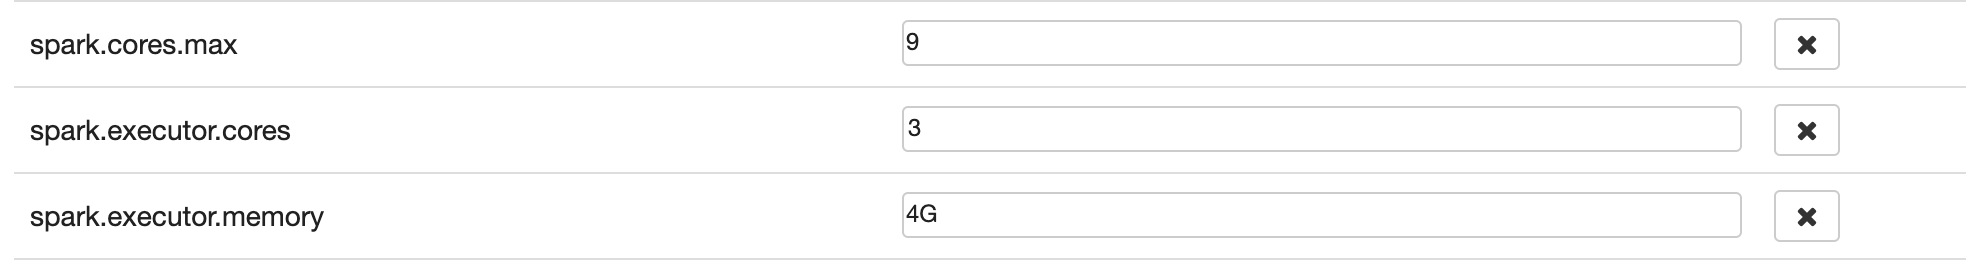

In [9]:
Image('./capture/interpreter_zeppelin2.png')

-----

- zeppelin note book (kikang)
   
    -----> 실행

In [ ]:
%spark2
sc.master

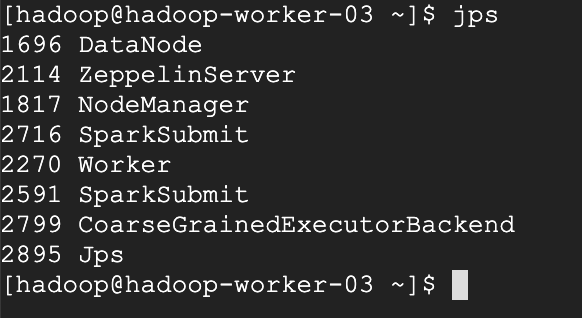

In [8]:
Image('./capture/worker3_jps.png')

 - SparkSubmit이 1개 더 뜸
 - CoarseGrainedExecutorBankend : 분산환경
 
----


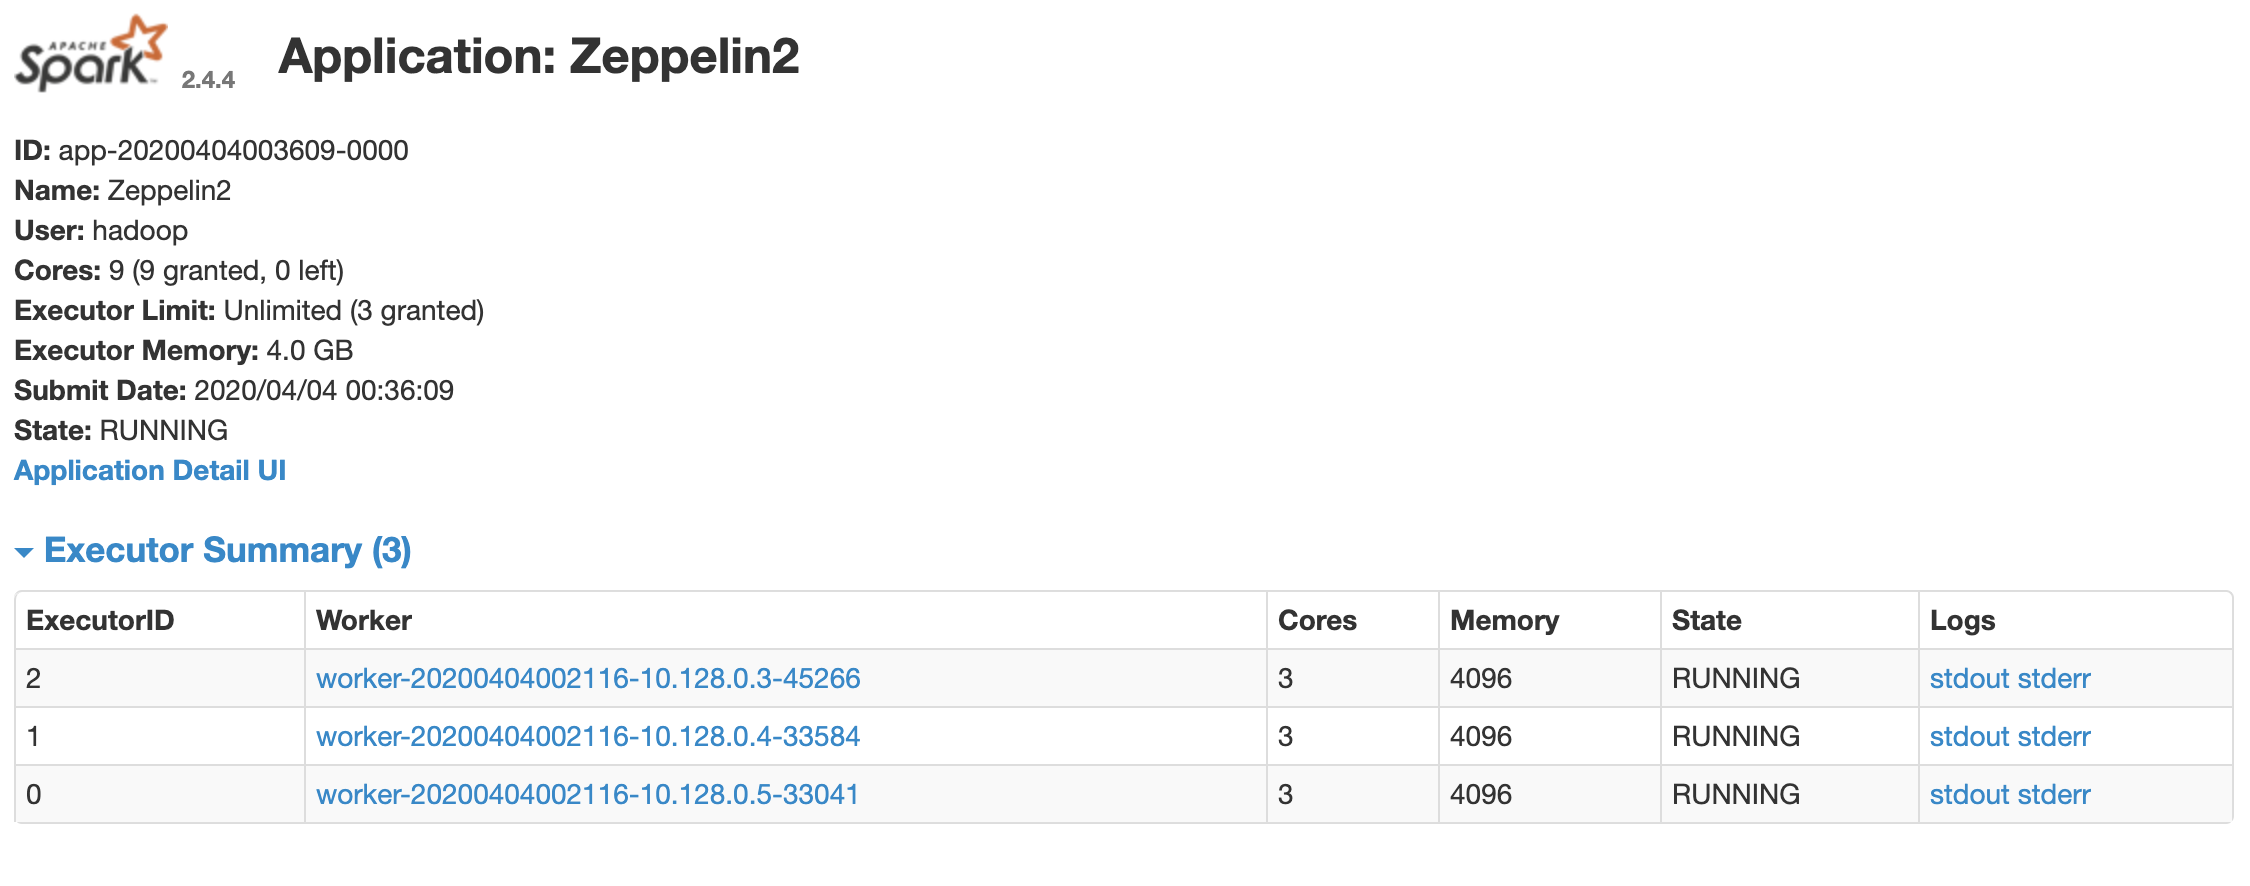

In [7]:
Image('./capture/stand_alone.png')

---
- cores : 3개, Memory : 4G

---
     
 - spark3 (새로 생성)
     - yarn connect

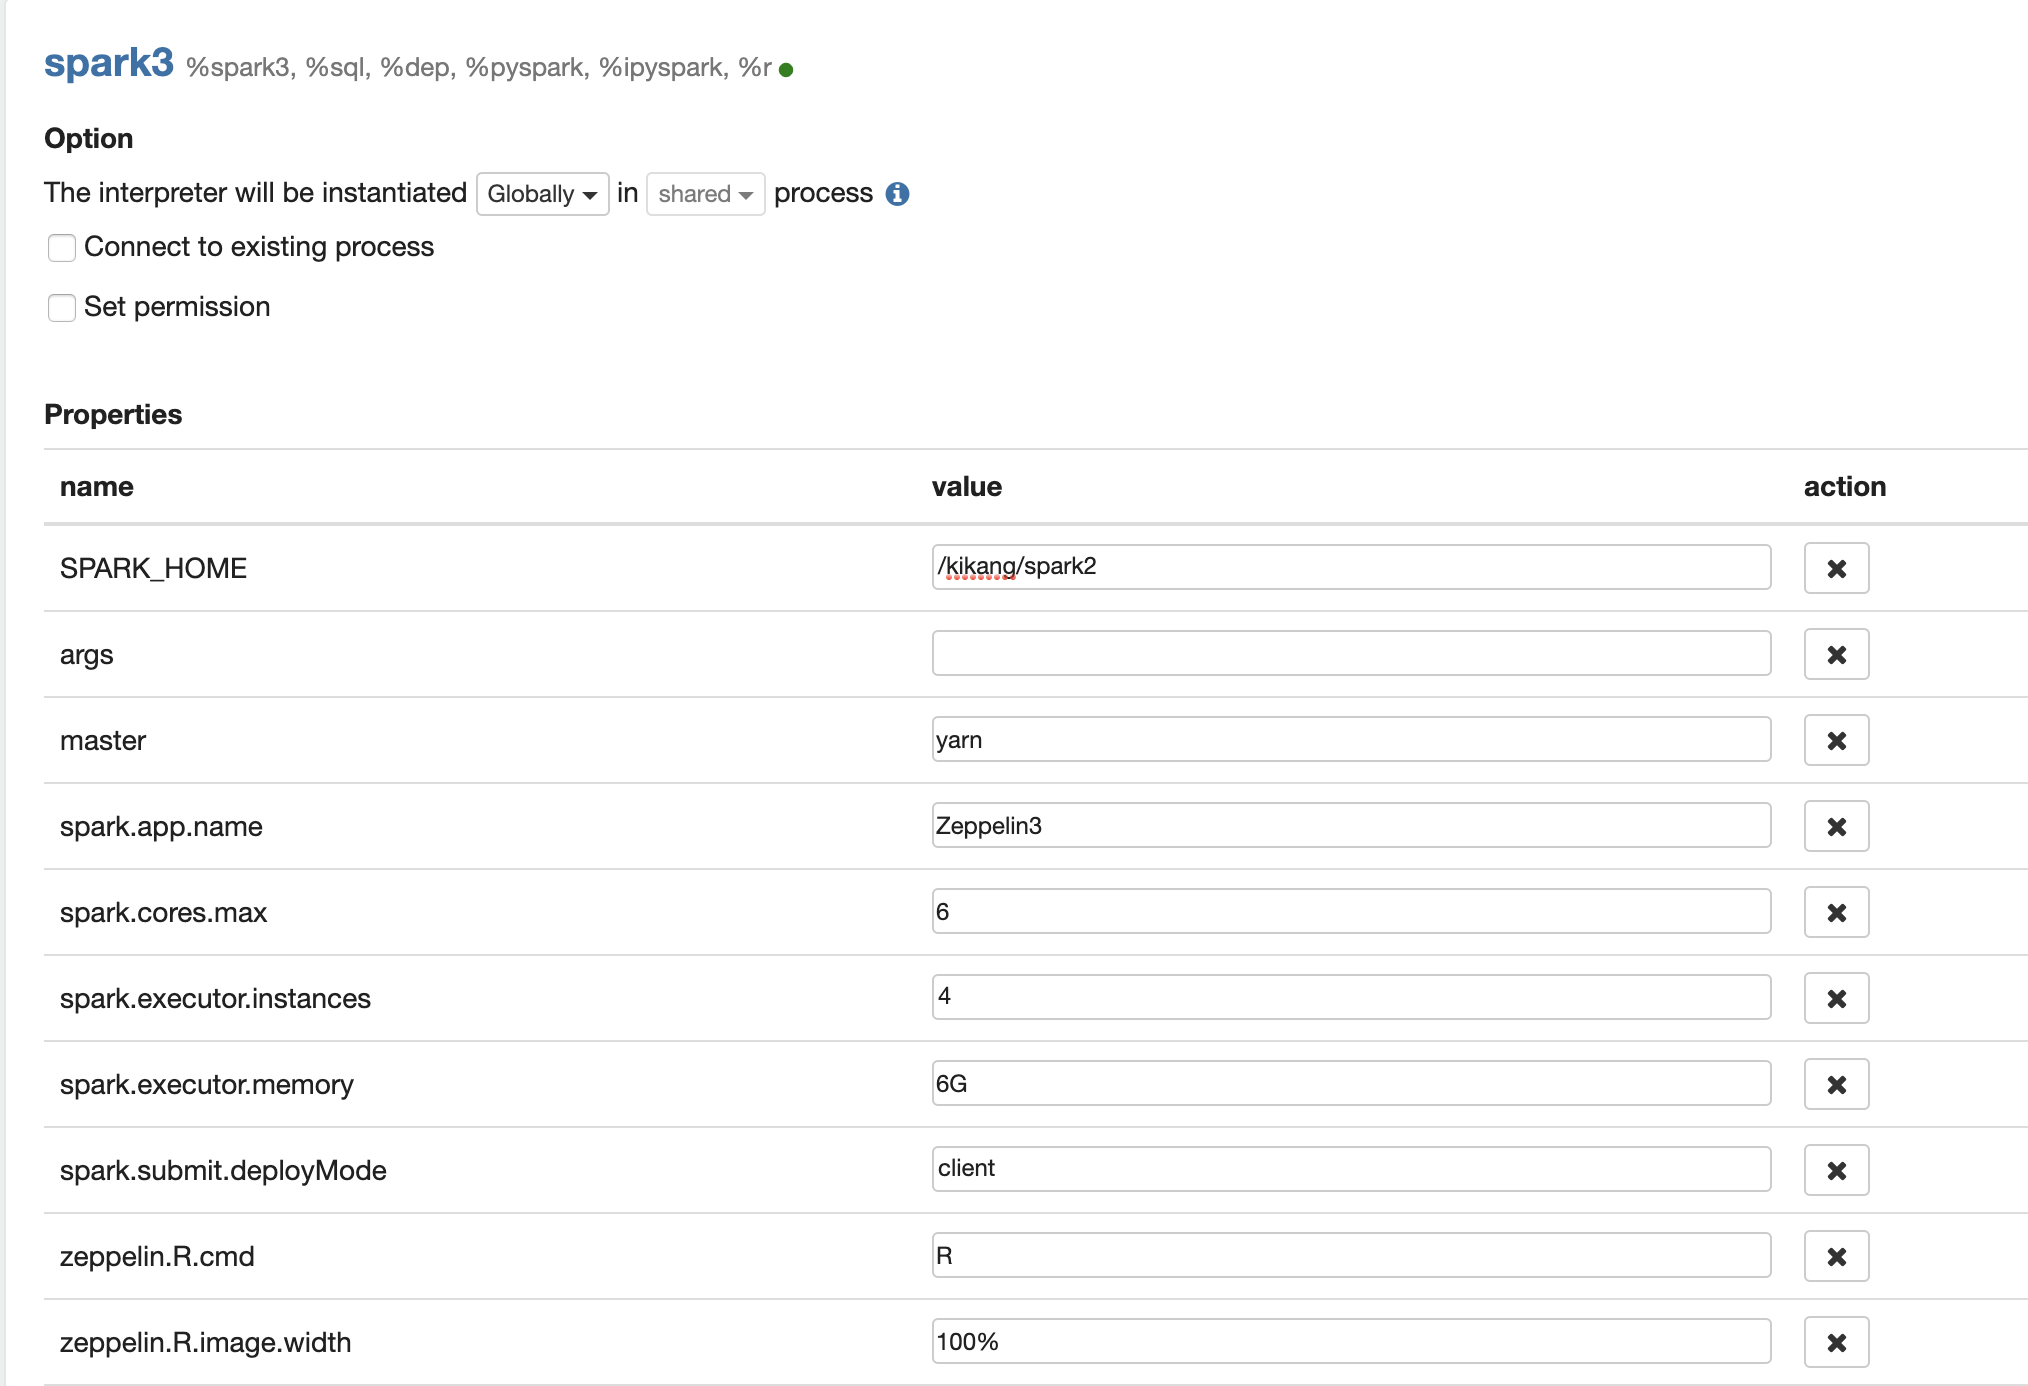

In [10]:
Image('./capture/interpreter_zeppelin3.png')

#### spark interpreter 설정

master => yarn
- SPARK_HOME => /kikang/spark2
- spark.cores.max => 6
- spark.executor.memory => 6G
- spark.submit.deployMode => client
 - client : default
 ---> 어디에서 띄울건가 ?
 
- spark.executor.instances => 4

----

 - zeppelin 
     
  ----> error : HADOOP_CONF_DIR or YARN_CONF_DIR

In [ ]:
%spark3 
sc.master

 - worker_03 설정 : zeppelin interpreter에서 설정하면?
     - $ mkdir conf2
     - $ cp /kikang/hadoop3/etc/hadoop/core-site.xml ./
     - $ cp /kikang/hadoop3/etc/hadoop/yarn-site.xml ./
     
     - spark3 edit 
         - HADOOP_CONF_DIR : /kikang/spark2/conf2
         
 ---- 
  - zeppelin
       ----> 실행
       - hadoop-master-01:8188 에서 확인 // application


In [ ]:
%spark3
sc.master 

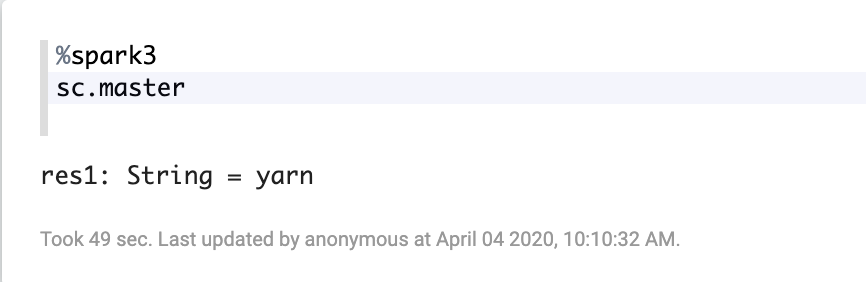

In [11]:
Image('./capture/Zeppelin3.png')

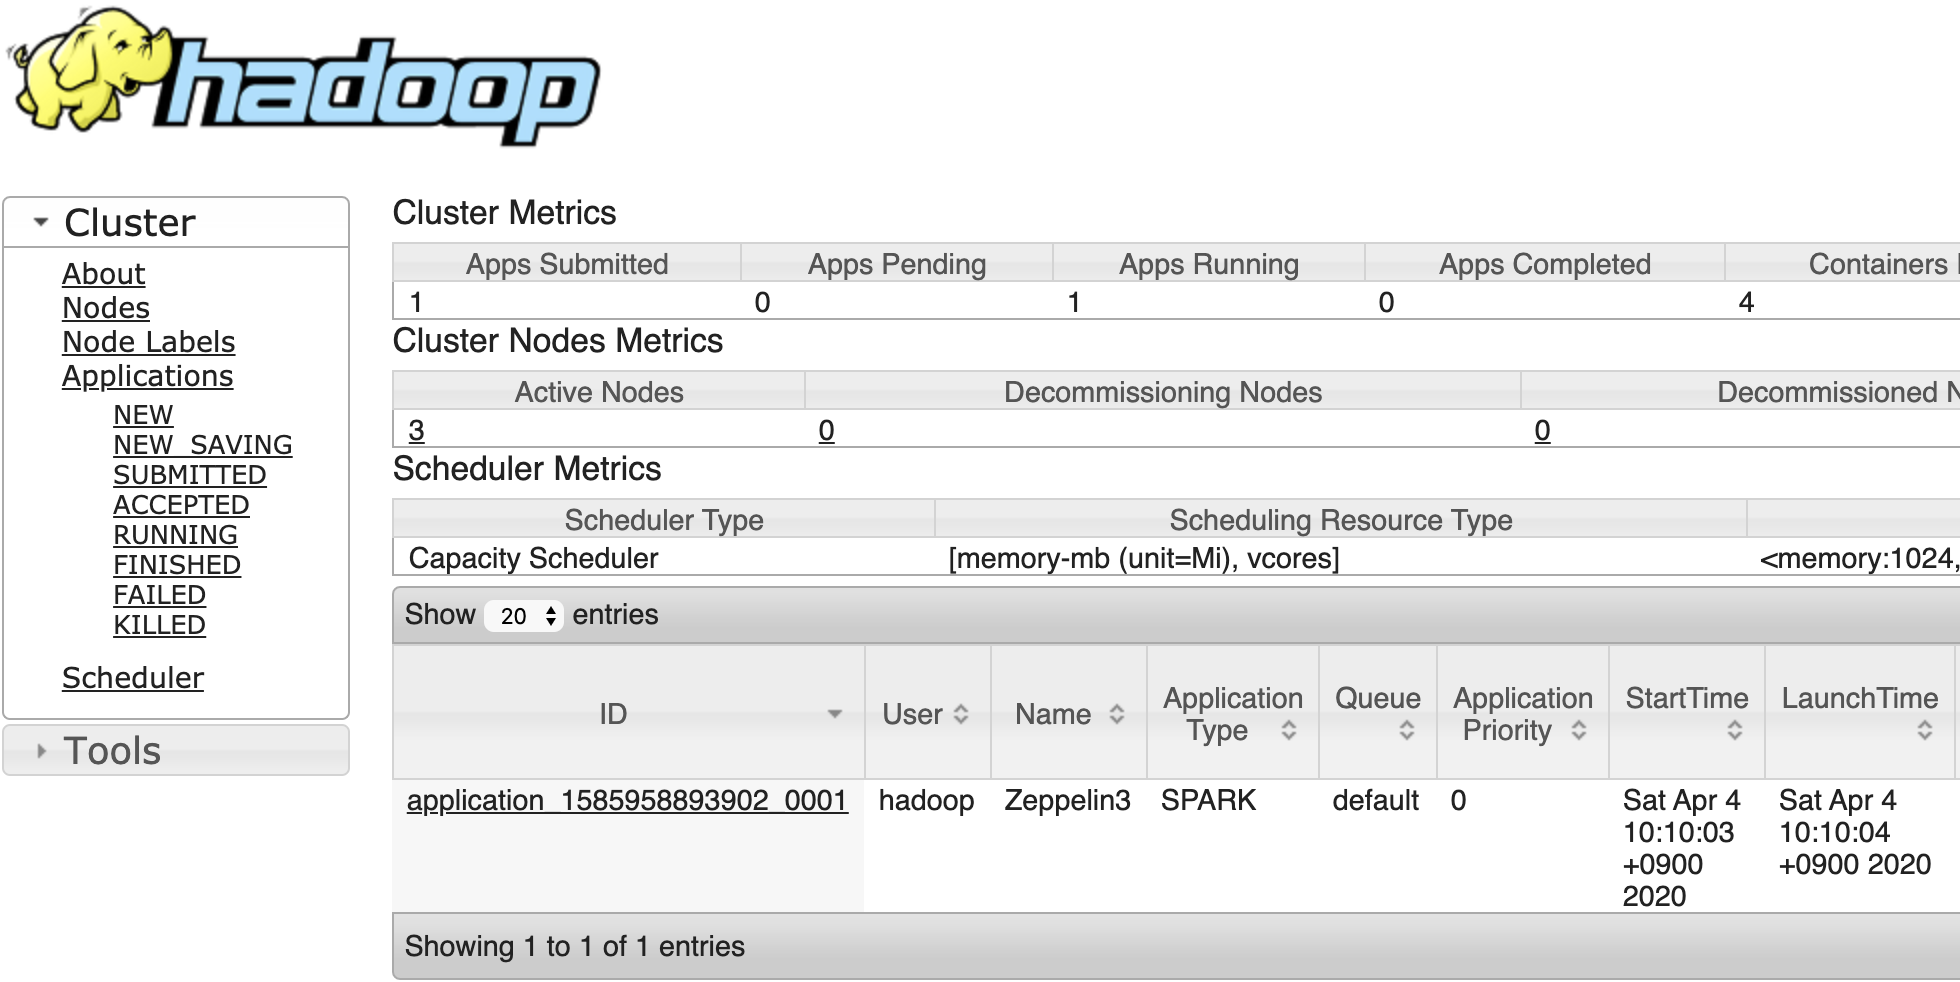

In [12]:
Image('./capture/zeppelin3_spark_UI.png')

- Applications -> ID -> Attempt ID -> Container ID

 ---> 01 000001 )) master


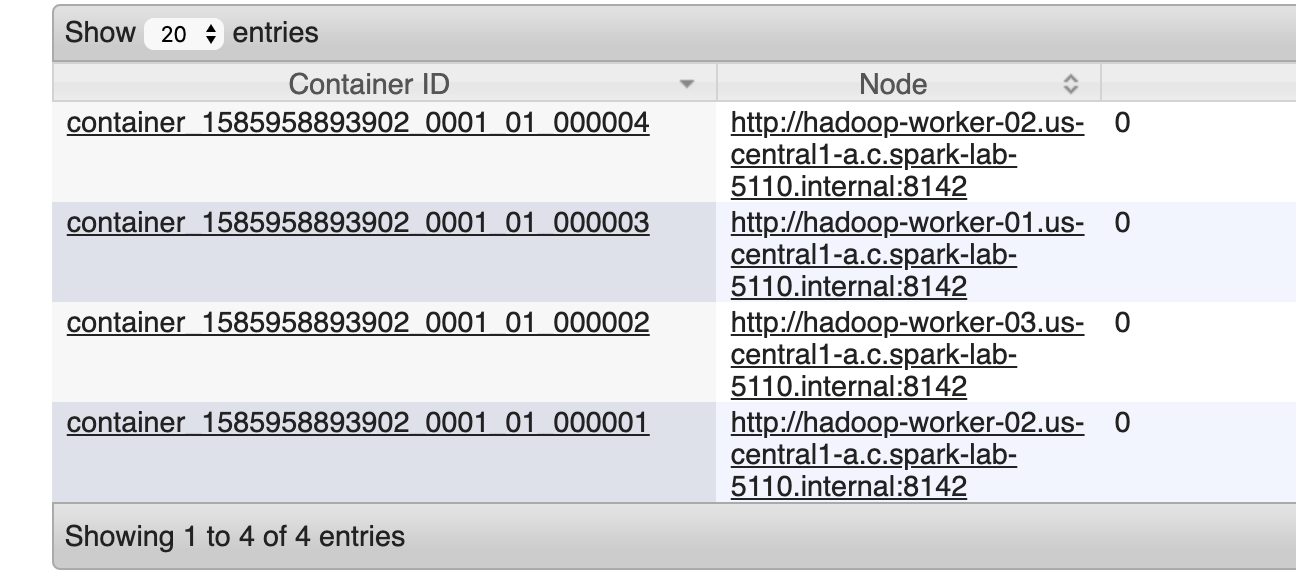

In [13]:
Image('./capture/zeppelin3_core.png')

- 할당받지 못해도 뜨긴함...;; 
- memory가 부족해서 excutor를 띄우지를 못했음. 

----
 
### spark3 interpreter edit
 - spark.executor.cores  // 2
 
cluster deploy mode only : 

    --driver-cores NUM 
   
spark standalone and Mesos only:

    --total-executor-cores NUM
     --> spark-cores-max
     
Spark standalone and YARN only:
    
    --executor-cores NUM

------
$ vi /kikang/hadoop3/etc/hadoop/capacity-scheduler.xml

 --> 잘 됨. 나중에 공유

- hadoop-master-01:8188
- Applications --> ID --> Tracking URL (click) - ApplicationMaster 

 ==> driver가 띄운 것을 중계해주는 역할


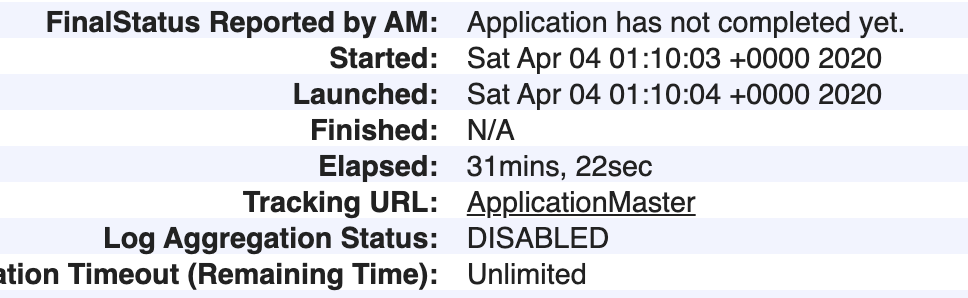

In [18]:
Image('./capture/Tracking_URL.png')

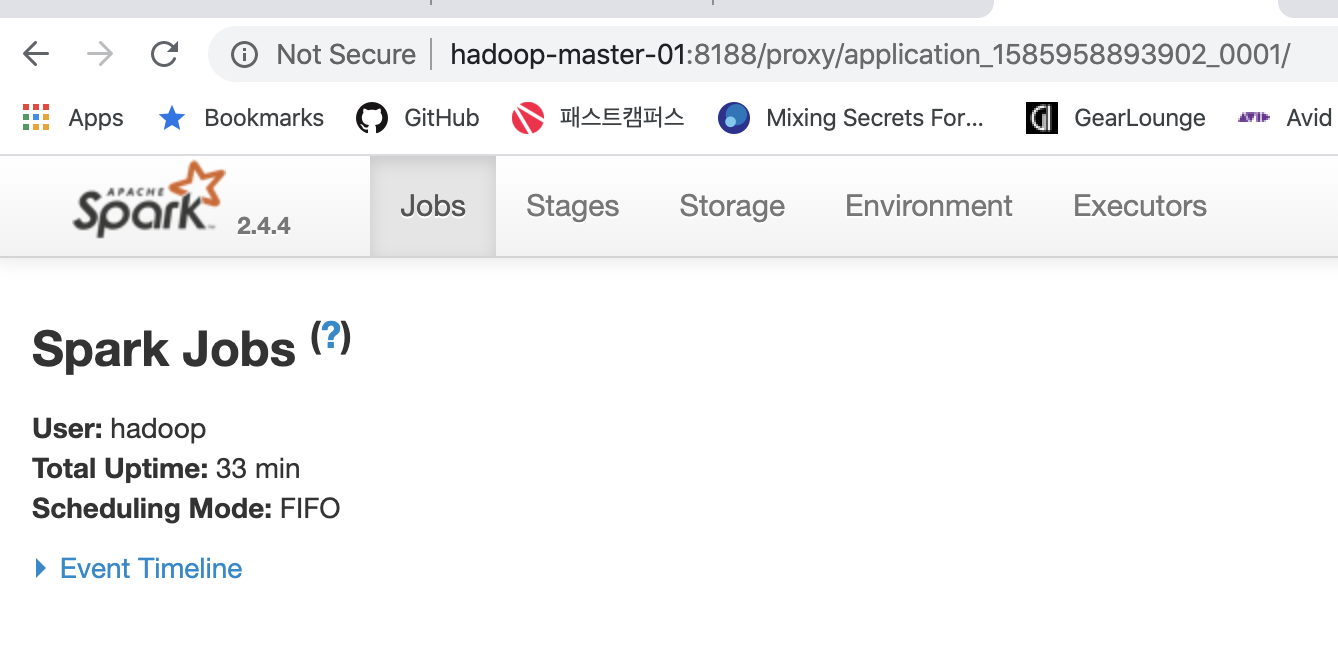

In [17]:
Image('./capture/ApplicatonMaster.png')

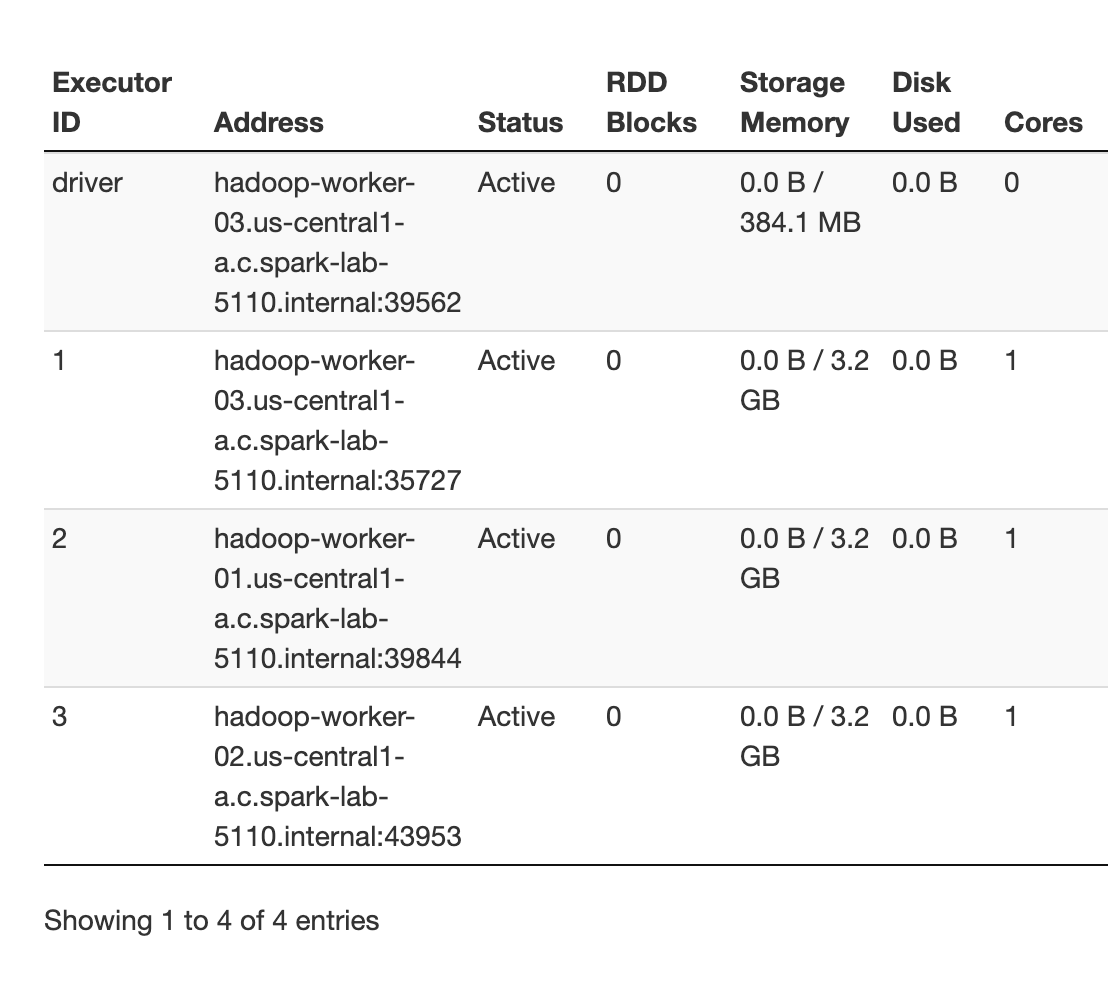

In [19]:
Image('./capture/Executors.png')

----

 * Executors : executor들의 목록을 볼 수 있음. 
 
  - 원래 요청한 것은 6G 
      - 보여지는 메모리는 executors로 할당받은 것이 아니라 storage memory! 
          - cash용으로 쓸 수 있는 용량이 3G



----
zeppelin_test 생성

#### 버전확인 

In [ ]:
sc.version

#### 분산환경 확인

In [ ]:
sc.master

#### 계정확인



In [ ]:
sc.sparkUser

---------
 **계정변경**
 
 - HADOOP_USER_NAME : spark  : 생성 후 저장
 - sc.sparkUser
     --> error : Permission denied: user=spark, access=WRITE, inode="/kikang/spark2/history":hadoop:supergroup:drwxr-xr-x
     
 ==> 설정하는 곳의 권한을 바꾼 후 변경 : spark2 edit __ HADOOP_USER_NAME : hadoop
 - sc.sparkUser : res1: String = hadoop

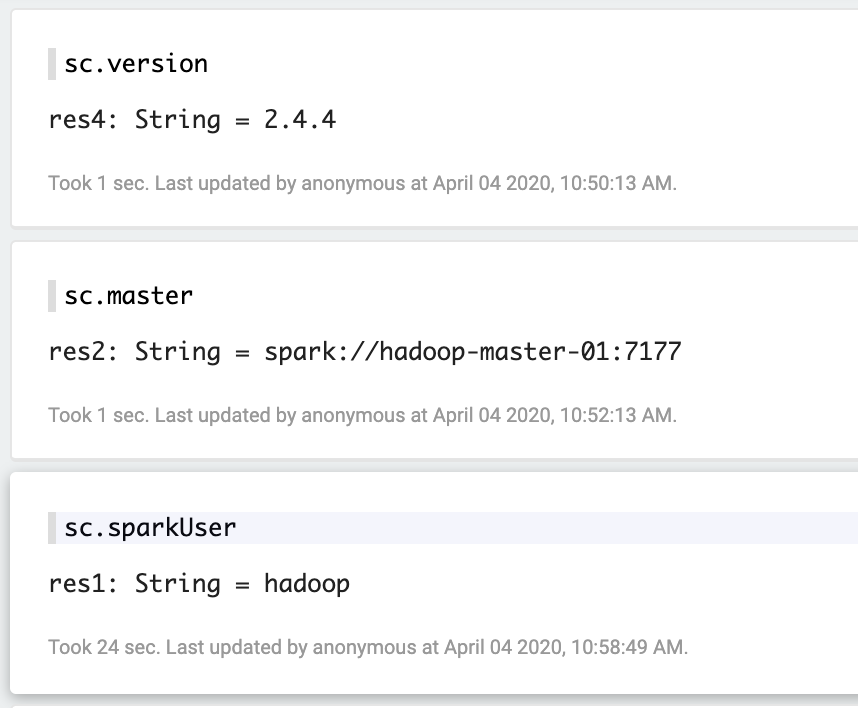

In [20]:
Image('./capture/zeppelin_test.png')

--- 
%sh : shell 명령어 사용


In [ ]:
%sh 
ls -al

In [ ]:
%sh 
pwd

  ----- 
  #### RemoteInterpreterServer : shell 

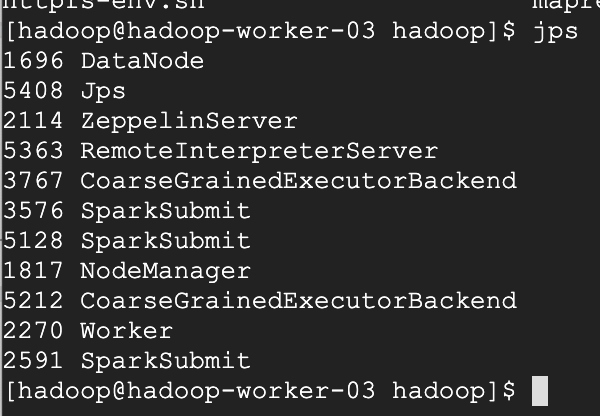

In [21]:
Image('./capture/remoteinterpreterserver.png')

 - zeppelin은 해당 단락 안에서만 적용됨.

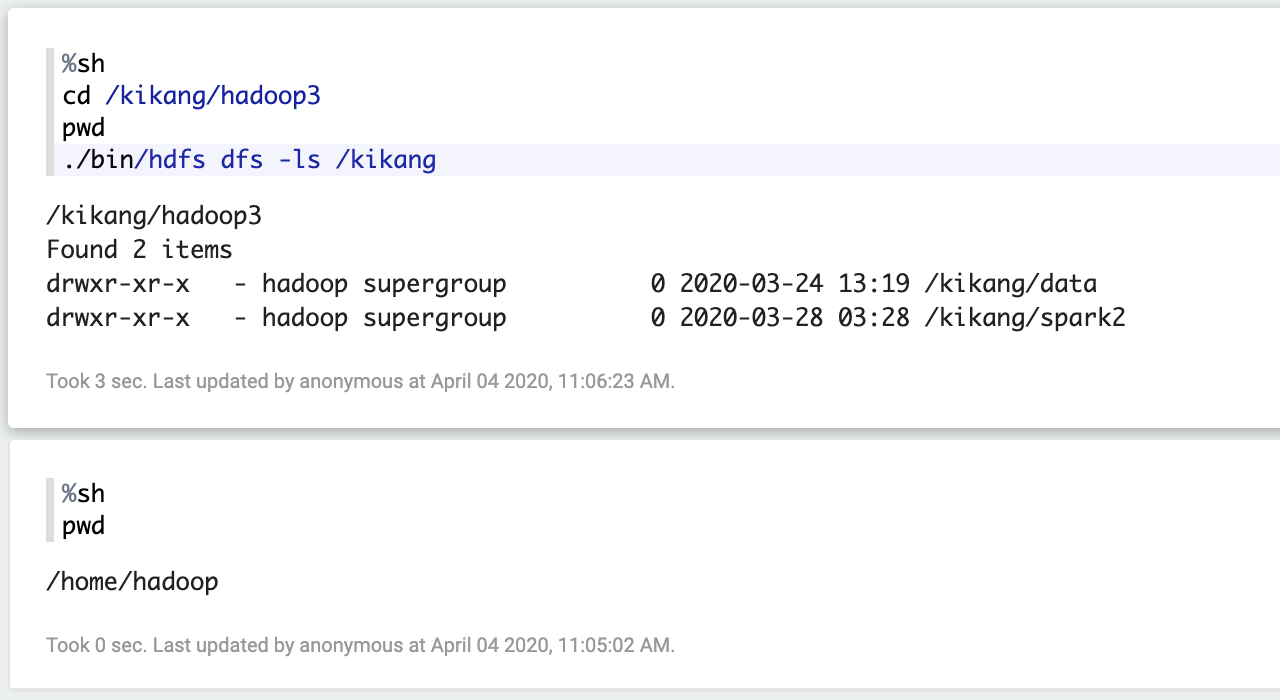

In [23]:
Image('./capture/%sh pwd.png')

- val sc = new SparkContext('master','app.name') : 원래는 이렇게 해야함. 

    But!!! zeppelin이 되면서 이미 설정 끝 !

----
- sc : rdd
- spark : sql

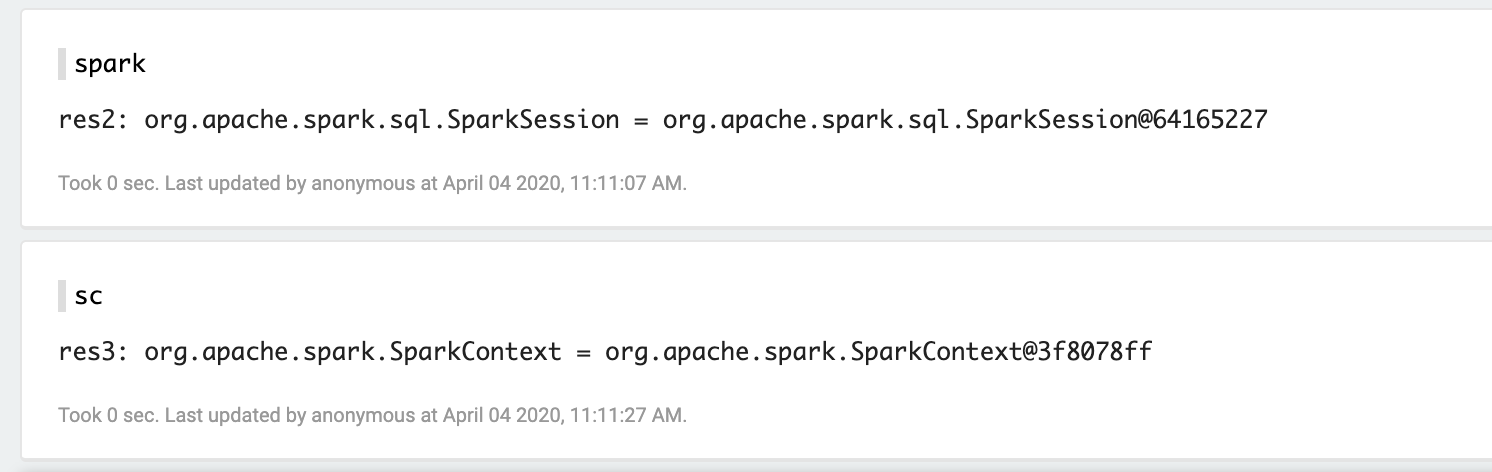

In [25]:
Image('./capture/sc_spark.png')

- val : 데이터를 받는 그릇, 여러군데 분산되어 있는 아이들 

In [ ]:
standalone --> excutors
val rdd = sc.textFile(""hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")
rdd.count

- res5: Long = 2389218

In [ ]:
rdd.getNumPartitions

 - res6: Int = 2 ( 병렬 2개 )
-----

In [ ]:
val rdd = sc.textFile(""hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv",minPartitions = 9)
rdd.getNumPartitions 

- res8: Int = 9

In [ ]:
rdd.take(2)

- res10: Array[String] = Array(Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay, 2008,1,3,4,1343,1325,1451,1435,WN,588,N240WN,68,70,55,16,18,HOU,LIT,393,4,9,0,,0,16,0,0,0,0)
  
  ------

In [ ]:
val rdd2 = rdd.map(line=>line.split(","))

- rdd2: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[6] at map at <console>:25
    
-----

In [ ]:
val rdd3 = rdd.flatMap(line => line.split(","))

- rdd3: org.apache.spark.rdd.RDD[String] = MapPartitionsRDD[7] at flatMap at <console>:25
-----

In [ ]:
rdd2.count

- res12: Long = 2389218
------

In [ ]:
rdd3.count

- res11: Long = 69287322
-----

In [ ]:
rdd2.take(2)

- res14: Array[Array[String]] = Array(Array(Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay), Array(2008, 1, 3, 4, 1343, 1325, 1451, 1435, WN, 588, N240WN, 68, 70, 55, 16, 18, HOU, LIT, 393, 4, 9, 0, "", 0, 16, 0, 0, 0, 0))- res14: Array[Array[String]] = Array(Array(Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay), Array(2008, 1, 3, 4, 1343, 1325, 1451, 1435, WN, 588, N240WN, 68, 70, 55, 16, 18, HOU, LIT, 393, 4, 9, 0, "", 0, 16, 0, 0, 0, 0))

----

In [ ]:
rdd3.take(2)

- res15: Array[String] = Array(Year, Month, DayofMonth)

---> 우리가 원하는 형태


In [ ]:
val rdd4 = rdd3.map(word => (word,1))

- rdd4: org.apache.spark.rdd.RDD[(String, Int)] = MapPartitionsRDD[10] at map at <console>:25

In [ ]:
val rdd5 = rdd4.reduceByKey((v1, v2) => v1 + v2)

- rdd5: org.apache.spark.rdd.RDD[(String, Int)] = ShuffledRDD[11] at reduceByKey at <console>:25

In [ ]:
rdd5.take(2)

- res16: Array[(String, Int)] = Array((3492,373), (N12322,317))

-----
   
 #### dataframe 만들기, 구조화된 데이터 읽기, from vkdlf (csv, json, parquet,orc 등등) , RDB, NoSQL
 

In [ ]:
val df = spark.read.csv("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")
df.printSchema

In [ ]:
val df = spark
.read
.option("header",true)
.option("inferSchema", true)
.csv("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")

-----

In [ ]:
df.describe().show()
val df = spark.read.option("header", true).csv("hdfs://hadoop-master-01:9000/kikang/data/airline_on_time/2008.csv")
df.select("Month","Year","FlightNum").show()

df.select("DayofMonth","DayofWeek","ArrDelay","DepDelay","FlightNum")
  .describe()
  .show()

In [ ]:
df
.select("DayofMonth","DayofWeek","ArrDelay","DepDelay","FlightNum")
.summary("count","mean","min","0%","50%","100%","max")
.show()

In [ ]:
df
.select("Month","Year","FlightNum")\
.groupBy("Year","Month")\
.agg(avg("FlightNum"), min("FlightNum"),max("FlightNum"))\
.show()

In [ ]:
df
.select("Month","Year","FlightNum")\
.groupBy("Year","Month")\
.agg(avg("FlightNum"), min("FlightNum"),max("FlightNum"),count("FlightNum").as("cnt_flight"))\
.show()

---

In [ ]:
df.createOrReplaceGlobalTempView("df")